# ECE 118

*Resource(s): Modern Control Systems, 12th edition, by Richard Dorf and Robert Bishop*

## Mass-Spring-Damper Mechanical System

The motion of the mass of a spring-mass-damper mechanical system, denoted by $ y(t) $, is described by the differential equation
$$
M\ddot{y}(t) + b\dot{y}(t) + ky(t) = r(t).
$$
The unforced dynamic response $y(t)$ of the spring-mass-damper mechanical system is
$$
\boxed{ y(t) = \frac{y(0)}{\sqrt{1-\zeta^2}} e^{-\zeta\omega_n t} \;sin\left(\omega_n \sqrt{1-\zeta^2}\;\;t + \theta\right),}
$$
where $ \omega_n = \sqrt{k/m}\; $, $\zeta = b/\left(2\sqrt{kM}\right)\;$, and $ \theta = cos^-1 \; \zeta $. The initial displacement is $y(0)$. The transient system response is underdamped when $ \zeta < 1$, overdamped when $ \zeta > 1$, and critically damped when $ \zeta = 1$. We can visualize the unforced time response of the mass displacement following an initial displacement of $ y(0) $.

Consider the underdamped case:
$$
y(0) = 0.15\;m, \;\; \omega_n = \sqrt{2}\;\frac{rad}{s}, \;\; \zeta = \frac{1}{2\sqrt{2}} \left( \frac{k}{M} = 2, \; \frac{b}{M} = 1 \right).
$$

The code for plotting the above equation is shown in the following:

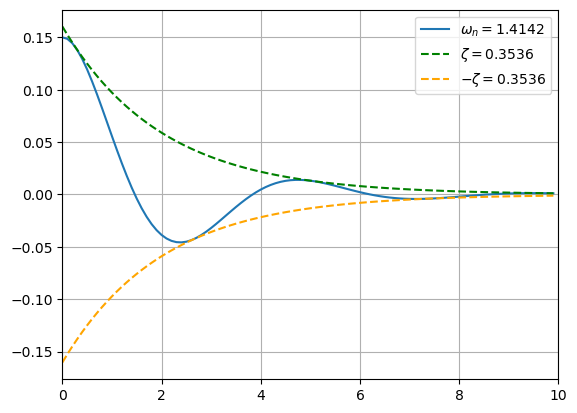

In [24]:
import control.matlab as control
import matplotlib.pyplot as plt
import numpy as np

y0 = 0.15
wn = np.sqrt(2)
zeta = 1/(2 * np.sqrt(2))
t = np.arange(0, 10, 0.1)


c = (y0 / np.sqrt(1 - np.square(zeta)))
y = c * np.exp(-zeta * wn * t) * np.sin(wn * np.sqrt(1 - np.square(zeta)) * t + np.arccos(zeta))

bu = c * np.exp(-zeta * wn * t)
bl = -bu

plt.plot(t, y, label=f"$\\omega_n={wn:0.4f}$")
plt.plot(t, bu,'--', color="green", label=f"$\\zeta={zeta:0.4f}$" )
plt.plot(t, bl, '--', color="orange",label=f"$-\\zeta={zeta:0.4f}$"  )
plt.xlim(0, 10)
plt.legend()
plt.grid()

## Polynomials
A transfer function is a ratio of polynomials. Working with transfer functions means that both a numerator polynomial and a denominator polynomial must be specified. Polynomials are represented by row vectors containing the polynomial coefficients in order of descending degree. For example, the polynomial
$$
p(s) = s^3 + 3s^2 + 4
$$
is entered in the following code. Notice that even though the coefficient of the $s$ term is zero, it is included in the input definition of $p(s)$. The roots of the polynomial $ p(s) = s^3 + 3s^2 + 4 $ can be computed using the `np.roots()` function and we can reassemble the polynomial with the `np.poly()` function, also shown in the following code. You might notice that the reassembled roots contains a negative coefficient where a '0' is supposed to be, this is becuase NumPy returns negative coefficients when computing the coefficients of a polynomial using complex roots due to the convention of using complex conjugates to determine the sign of the coefficients. This ensures that the resulting polynomial remains real-valued. For this example, this has no impact on the final solution as $-8.8817842e^{-16} $ or approximately $ -8.88e^{-16}$ is approximately equivalent to $-0.000000000000000888$...very close to zero.

In [4]:
p = [1, 3, 0, 4]
r = np.roots(p)

print(f"The roots of p are: {r}")

p = np.poly(r)

print(f"The reassembled polynomial from roots is: {p}")

The roots of p are: [-3.3553014+0.j          0.1776507+1.07730381j  0.1776507-1.07730381j]
The reassembled polynomial from roots is: [ 1.0000000e+00  3.0000000e+00 -8.8817842e-16  4.0000000e+00]


Multiplication of polynomials is accomplished with the `np.convolve` function. Suppose we want to expand the polynomial $$ n(s) = (3s^2 + 2s + 1)(s+ 4), $$ then the expanded polynomial is $$ n(s) = 3s^3 + 14s^2 + 9s + 4. $$ The associated commands are shown in the following code block.

In [5]:
p = np.array([3, 2, 1])
q = np.array([1, 4])
n = np.convolve(p, q)
print(f"The coefficients of the expanded polynomials are: {n}")

The coefficients of the expanded polynomials are: [ 3 14  9  4]


The function `np.polyval()` is used to evaluate the value of a polynomial at the given value of the variable. The polynomial $n(s)$ has the value $n(−5) = −66$, as shown in the following code.

In [7]:
value = np.polyval(n, -5)
value

-66

## Transfer Functions


Linear, time-invariant system models can be treated as *objects*, allowing one to manipulate the system models as single entities. In the case of transfer functions, one creates the system models using the `tf` function; for state variable models one employs the `ss` function. For example, consider the two system models $$ G_1(s) = \frac{10}{s^2+2s + 5} $$ and $$ G_2(s) = \frac{1}{s+1}. $$ The systems $ G_1(s) $ and $G_2(s) $ can be added using the "$ + $" operator yielding $$ G(s) = G_1(s) + G_2(s) = \frac{s^2 + 12s + 15}{s^3 + 3s^2 + 7s + 5}. $$ The corresponding commands are shown in the following code where `sys1` represents $G_1(s)$ and `sys2` represents $G_2(s).$


In [ ]:
import control.matlab as control
import numpy as np
import matplotlib.pyplot as plt


num1 = [10]
den1 = [1, 2, 5]
sys1 = control.tf(num1, den1)

num2 = [1]
den2 = [1, 1]
sys2 = control.tf(num2, den2)

sys = sys1 + sys2
sys

 the answer


TransferFunction(array([ 1, 12, 15]), array([1, 3, 7, 5]))

Computing the poles and zeros associated with a transfer function is accomplished by operating on the system model object with the `pole` and `zero` functions, respectively, as illustrated in the following:

In [ ]:
import control.matlab as control
import numpy as np
import matplotlib.pyplot as plt

sys = control.tf([1,10], [1, 2, 1])

p = control.pole(sys)

z = control.zeros(sys)

print(f"The system poles: {p}")
print(f"The system zeros: {z}")



The system poles: [-1.+0.j -1.+0.j]
The system zeros: [-10.+0.j]


In the next example, we obtain a plot of the pole–zero locations in the complex plane. This will be accomplished using the `pzmap` function. On the pole–zero map, zeros are denoted by an “o” and poles are denoted by an “×” If the `pzmap` function is invoked without left-hand arguments, the plot is generated automatically.

Consider the transfer functions $$ G(s) = \frac{6s^2 + 1}{s^3 + 3s^2 + 3s + 1}  $$ and $$ H(s) \frac{(s+1)(s+2)}{(s+2i)(s-2i)(s+3)}. $$

We can compute for the poles and zeros of $G(s)$, the characteristic equation of $H(s)$, and divide $G(s)$ and $H(s)$. We can also obtain a plot of the pole-zero map of $G(s)/H(s)$ in the complex plane. These commands are shown in the following code.

In [13]:
import control.matlab as control
import numpy as np
import matplotlib.pyplot as plt

numg = [6, 0, 1]
deng = [1, 3, 3, 1]

sysg = control.tf(numg, deng)

# Compute poles and zeros
pg = control.pole(sysg)
zg = control.zero(sysg)

print (f"The poles of G(s): {pg}")
print(f"The zeros of G(s): {zg}")


The poles of G(s): [-0.999996  +6.93463265e-06j -0.999996  -6.93463265e-06j
 -1.00000801+0.00000000e+00j]
The zeros of G(s): [-0.+0.40824829j  0.-0.40824829j]


In [21]:
# Expand H(s)
hn1 = [1, 1]
hn2 = [1, 2]

hd1 = [1, 2j]
hd2 = [1, -2j]
hd3 = [1, 3]

numh = np.convolve(hn1, hn2)
denh = np.convolve(hd1, np.convolve(hd2, hd3))

# H(s)
sysh = control.tf(numh, denh)

print("The transfer function H(s) is:")
sysh



The transfer function H(s) is:


TransferFunction(array([1, 3, 2]), array([ 1.+0.j,  3.+0.j,  4.+0.j, 12.+0.j]))

In [22]:
# sys = G(s) / H(s)
sys = sysg/sysh

print(f"The transfer function G(s)/H(s) is :")
sys


The transfer function G(s)/H(s) is :


TransferFunction(array([ 6.+0.j, 18.+0.j, 25.+0.j, 75.+0.j,  4.+0.j, 12.+0.j]), array([ 1,  6, 14, 16,  9,  2]))

In [ ]:
print("The pole-zero plot is:")
# Pole-zero map
control.pzmap(sys)

Suppose we have developed mathematical models in the form of transfer functions for a process, represented by $G(s)$, and a controller, represented by $G_c(s)$, and possibly many other system components such as sensors and actuators. Our objective is to interconnect these components to form a control system. 

A simple open-loop control system can be obtained by interconnecting a process and a controller in series as illustrated in the following 
$$ 

R(s) \longrightarrow \boxed{\overset{Controller}{G_c(s)}}  \xrightarrow{U(s)} \boxed{\overset{Process}{G(s)}} \longrightarrow Y(s)

$$ We can compute the transfer function from R(s) to Y(s), as follows.

### Example
Let the process represented by the transfer function $G(s)$ be $$ G(s) = \frac{1}{500s^2},  $$ and let the controller represented by the transfer function $G_c(s)$ be $$ G_c(s) = \frac{s+1}{s+2}. $$ We can use the `series` function to cascade two transfer functions $G_1(s)$ and $G_2(s)$, as shown 

$$ U(s) \longrightarrow \boxed{\overset{System 1}{G_1(s)}} \longrightarrow \boxed{\overset{System 2}{G_2(s)}} \longrightarrow Y(s) $$ 

The transfer function $G_c(s)G(s) $ is computed using the series function like so `[sys] = series(sys1, sys2)`. The resulting transfer function is $$G_c(s)G(s) = \frac{s+1}{500s^3 + 1000s^2}= sys,$$

In [ ]:
import control.matlab as control
import matplotlib.pyplot as plt
import numpy as np

numg = [1]
deng = [500, 0, 0]
sysg = control.tf(numg, deng)

numh = [1, 1]
denh = [1, 2]
sysh = control.tf(numh, denh)

sys = control.series(sysg, sysh)
sys

TransferFunction(array([1, 1]), array([ 500, 1000,    0,    0]))

Block diagrams can contain parallel transfer functions. For transfer functions in parallel, the `parallel` function is useful. If a feedback signal is introduced into the control system by closing the unity feedback, we can evaluate the transfer function using the `feedback` function. Both cases are showin in the following code.

In [ ]:
import control.matlab as control
import matplotlib.pyplot as plt
import numpy as np

numg = [1]
deng = [500, 0, 0]
sys1 = control.tf(numg, deng)

numh = [1, 1]
denh = [1, 2]
sys2 = control.tf(numh, denh)

sys3 = control.series(sysg, sysh)
sys = control.feedback(sys3, sign=-1)
sys

TransferFunction(array([1, 1]), array([ 500, 1000,    1,    1]))

### Exercises
1. Consider the two polynomials
$$ p(s) = s^2 +7s + 10 $$

and 

$$ q(s) = s + 2 $$

Compute the following <br>
(a)&emsp;$p(s)\,q(s)$ <br>
(b)&emsp;poles and zeros of $G(s) = \frac{q(s)}{p(s)}$ <br>
(c)&emsp;$p(-1)$

In [ ]:
p = [1, 7, 10]
q = [1, 2]
pq = np.convolve(p,q)
print(f"(a).\n p(s)q(s) is: {pq}")

p_roots = np.roots(p)
q_roots = np.roots(q)

print(f"(b).\nRoots of p(s) = {p_roots}")
print(f"Roots of q(s) = {q_roots}")

value = np.polyval(p, -1)
print(f"(c). \n The value at p(-1): {value}")


2. Consider the differential equation
$$ \ddot{y}+ 4\dot{y}+ 3y = u $$
where $y(0) = \dot{y}(0) = 0 $ and $u(t)$ is a unit step.
Determine
the solution $y(t)$ analytically, and verify
by co-plotting the analytic solution and the step response
obtained with the step function.

##### Analytical solution
Given $$ \ddot{y} + 4\dot{y} + 3y = u $$ 
with $y(0)=\dot{y} = 0 $ and $U(s) = 1/s$, we obtain (via Laplace Transform)

$$ Y(s) = \frac{1}{s(s^2 + 4s + 3)} = \frac{1}{s(s+3)(s+1)}. $$

Expanding in a partial fraction expansion yields
$$ Y(s) = \frac{1}{3s}-\frac{1}{6(s+3)}-\frac{1}{2(s+1)}. $$

Taking the inverse Laplace transform, we obtain the solution

$$ y(t) = 0.3333 + 0.1667e^{-3t} - 0.5e^{-t} 
$$.
The code is shown as follows:

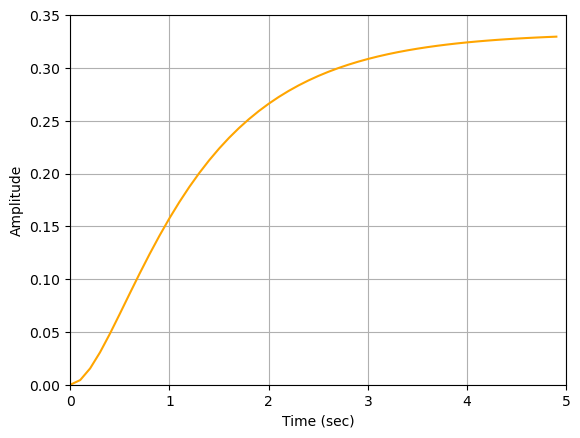

In [95]:
import matplotlib.pyplot as plt
import numpy as np
import control.matlab as control

n = [1]
d = [1, 4, 3]
sys = control.tf(n, d)
t = np.arange(0, 5, 0.1)
y, tout = control.step(sys, t)
ya = 0.3333 + (0.1667 * np.exp(-3 * t))-(0.5*np.exp(-t))
plt.plot(tout, y, color="orange")
#plt.plot(t, ya, color="green")
plt.ylim(0, 0.35)
plt.ylabel('Amplitude')
plt.xlabel('Time (sec)')
plt.xlim(0, 5)
plt.grid()
plt.show()

3. The mass-spring-damper system is represented by
$$ m\ddot{x} + b\dot{x} + kx = f 
$$.
Taking the Laplace transform (with zero initial conditions) yields the transfer function
$$
X(s)/F(s) = \frac{1/m}{s^2 + bs/m + k/m}
$$
The code and step response is shown in the following:


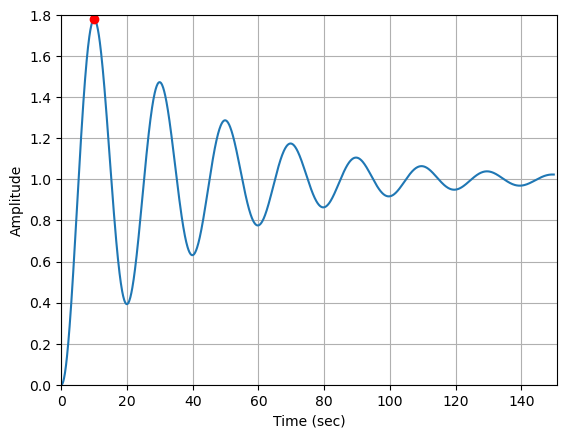

(array([100]),)
1.7794217181443504


In [98]:
import matplotlib.pyplot as plt
import numpy as np
import control.matlab as control

m = 10
k = 1
b = 0.5
num = [1/m]
den = [1, b/m, k/m]

sys = control.tf(num, den)
t = np.arange(0, 150, 0.1)
y, tout = control.step(sys, t)

max_y = np.max(y)
max_y_index = np.where(y == max_y)

plt.plot(tout, y)
plt.plot(tout[max_y_index],max_y, 'ro')
plt.grid()
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude')
plt.xlim(0, 151)
plt.ylim(0, 1.80)
plt.show()


print(max_y_index)
print(max_y)
